## Importing and Cleaning of Data

In [217]:
# import libraries

import numpy as np
import pandas as pd

In [218]:
df = pd.read_csv('vgsales.csv')

In [219]:
# Check for null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [220]:
# Drop null values
df = df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [221]:
# Drop rows with future values
df = df[df['Year'] < 2017]

In [222]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Analysis

### Top Game Sales By Region

In [223]:
# Check number of duplicate game titles
# They exist because there are multiple platforms for the same game
df.duplicated(subset="Name").sum()

4965

In [224]:
# Group by game title and sum the sales
df_uniqueTitles = df.groupby("Name").agg({ 
 "NA_Sales": "sum", 
 "EU_Sales": "sum", 
 "JP_Sales": "sum", 
 "Other_Sales": "sum", 
 "Global_Sales": "sum"
 })

In [225]:
# Sort by Global Sales
df_uniqueTitles = df_uniqueTitles.sort_values(by="Global_Sales", ascending=False).reset_index()

# Add a column for Rank of Global Sales
df_uniqueTitles.insert(1, "Rank", df_uniqueTitles.index + 1)

# Check if there are still duplicate game titles
df_uniqueTitles.duplicated("Name").sum()

0

In [226]:
df_uniqueTitles = df_uniqueTitles.sort_values(by="Global_Sales", ascending=False)
df_uniqueTitles[["Name","Rank","Global_Sales"]].head(10)

,Name,Rank,Global_Sales
0,Wii Sports,1,82.74
1,Grand Theft Auto V,2,55.92
2,Super Mario Bros.,3,45.31
3,Tetris,4,35.84
4,Mario Kart Wii,5,35.82
5,Wii Sports Resort,6,33.00
6,Pokemon Red/Pokemon Blue,7,31.37
7,Call of Duty: Modern Warfare 3,8,30.83
8,New Super Mario Bros.,9,30.01
9,Call of Duty: Black Ops II,10,29.72


In [227]:
df_uniqueTitles = df_uniqueTitles.sort_values(by="NA_Sales", ascending=False)
df_uniqueTitles[["Name","Rank","NA_Sales"]].head(10)

,Name,Rank,NA_Sales
0,Wii Sports,1,41.49
2,Super Mario Bros.,3,32.48
13,Duck Hunt,14,26.93
3,Tetris,4,26.17
1,Grand Theft Auto V,2,23.46
10,Call of Duty: Black Ops,11,17.01
15,Super Mario World,16,15.99
4,Mario Kart Wii,5,15.85
5,Wii Sports Resort,6,15.75
7,Call of Duty: Modern Warfare 3,8,15.58


In [228]:
df_uniqueTitles = df_uniqueTitles.sort_values(by="EU_Sales", ascending=False)
df_uniqueTitles[["Name","Rank","EU_Sales"]].head(10)

,Name,Rank,EU_Sales
0,Wii Sports,1,29.02
1,Grand Theft Auto V,2,23.04
4,Mario Kart Wii,5,12.88
32,FIFA 15,33,12.40
7,Call of Duty: Modern Warfare 3,8,11.29
38,FIFA 16,39,11.29
37,FIFA 14,38,11.14
9,Call of Duty: Black Ops II,10,11.05
5,Wii Sports Resort,6,11.01
18,Nintendogs,19,11.00


In [229]:
df_uniqueTitles = df_uniqueTitles.sort_values(by="JP_Sales", ascending=False)
df_uniqueTitles[["Name","Rank","JP_Sales"]].head(10)

,Name,Rank,JP_Sales
6,Pokemon Red/Pokemon Blue,7,10.22
22,Pokemon Gold/Pokemon Silver,23,7.20
2,Super Mario Bros.,3,6.96
8,New Super Mario Bros.,9,6.50
33,Pokemon Diamond/Pokemon Pearl,34,6.04
3,Tetris,4,6.03
46,Pokemon Black/Pokemon White,47,5.65
246,Dragon Quest VII: Warriors of Eden,247,5.40
43,Pokemon Ruby/Pokemon Sapphire,44,5.38
66,Animal Crossing: Wild World,67,5.33


In [230]:
df_uniqueTitles = df_uniqueTitles.sort_values(by="Other_Sales", ascending=False)
df_uniqueTitles[["Name","Rank","Other_Sales"]].head(10)

,Name,Rank,Other_Sales
19,Grand Theft Auto: San Andreas,20,10.72
0,Wii Sports,1,8.46
1,Grand Theft Auto V,2,8.03
72,Gran Turismo 4,73,7.53
9,Call of Duty: Black Ops II,10,3.88
105,FIFA Soccer 08,106,3.53
125,Pro Evolution Soccer 2008,126,3.51
16,Call of Duty: Black Ops 3,17,3.42
7,Call of Duty: Modern Warfare 3,8,3.35
4,Mario Kart Wii,5,3.31


### Other

In [231]:
# Check number of unique game platforms
df.duplicated(subset="Platform").sum()

16256

In [232]:
# Group by game title and sum the sales
df_uniquePlat = df.groupby("Platform").agg({
 "NA_Sales": "sum", 
 "EU_Sales": "sum", 
 "JP_Sales": "sum", 
 "Other_Sales": "sum", 
 "Global_Sales": "sum"
 })

In [233]:
# Sort by Global Sales
df_uniquePlat = df_uniquePlat.sort_values(by="Global_Sales", ascending=False).reset_index()

# Add a column for Rank of Global Sales
df_uniquePlat.insert(1, "Rank", df_uniquePlat.index + 1)

# Check if there are still duplicate game platforms
df_uniquePlat.duplicated("Platform").sum()

0

In [234]:
df_uniquePlat = df_uniquePlat.sort_values(by="Global_Sales", ascending=False)
df_uniquePlat[["Platform","Rank","Global_Sales"]].head(10)

,Platform,Rank,Global_Sales
0,PS2,1,1233.46
1,X360,2,969.60
2,PS3,3,949.35
3,Wii,4,909.81
4,DS,5,818.62
5,PS,6,727.39
6,GBA,7,305.62
7,PSP,8,291.71
8,PS4,9,278.07
9,PC,10,254.70


In [235]:
df_uniquePlat = df_uniquePlat.sort_values(by="NA_Sales", ascending=False)
df_uniquePlat[["Platform","Rank","NA_Sales"]].head(10)

,Platform,Rank,NA_Sales
1,X360,2,594.33
0,PS2,1,572.92
3,Wii,4,497.37
2,PS3,3,388.90
4,DS,5,388.26
5,PS,6,334.71
11,XB,12,182.06
6,GBA,7,178.43
14,N64,15,138.91
16,GC,17,131.94


In [236]:
df_uniquePlat = df_uniquePlat.sort_values(by="EU_Sales", ascending=False)
df_uniquePlat[["Platform","Rank","EU_Sales"]].head(10)

,Platform,Rank,EU_Sales
2,PS3,3,340.47
0,PS2,1,332.63
1,X360,2,278.00
3,Wii,4,264.35
5,PS,6,212.38
4,DS,5,194.05
9,PC,10,137.35
8,PS4,9,123.70
6,GBA,7,72.49
7,PSP,8,67.16


In [237]:
df_uniquePlat = df_uniquePlat.sort_values(by="JP_Sales", ascending=False)
df_uniquePlat[["Platform","Rank","JP_Sales"]].head(10)

,Platform,Rank,JP_Sales
4,DS,5,175.02
5,PS,6,139.78
0,PS2,1,137.54
15,SNES,16,116.55
12,NES,13,98.65
13,3DS,14,97.30
10,GB,11,85.12
2,PS3,3,79.21
7,PSP,8,75.89
3,Wii,4,68.28


In [238]:
df_uniquePlat = df_uniquePlat.sort_values(by="Other_Sales", ascending=False)
df_uniquePlat[["Platform","Rank", "Other_Sales"]].head(10)

,Platform,Rank,Other_Sales
0,PS2,1,190.47
2,PS3,3,140.81
1,X360,2,84.67
3,Wii,4,79.20
4,DS,5,60.27
8,PS4,9,43.36
7,PSP,8,41.52
5,PS,6,40.69
9,PC,10,24.33
13,3DS,14,12.55


## Visualization

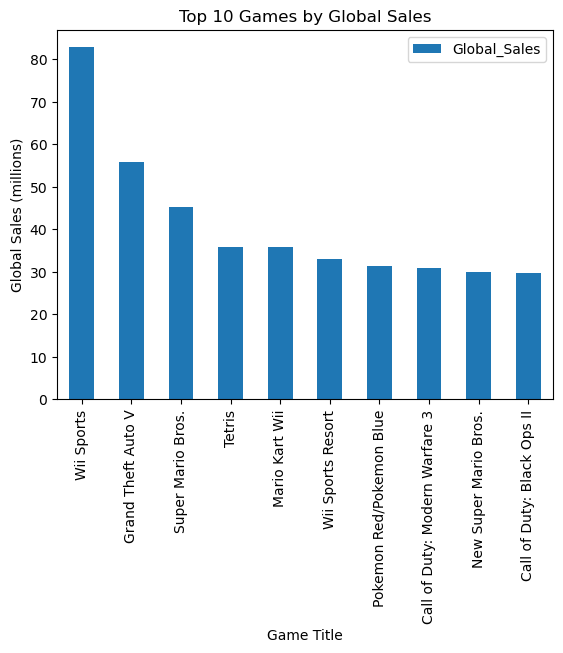

In [239]:
df_uniqueTitles = df_uniqueTitles.sort_values(by="Global_Sales", ascending=False)
df_uniqueTitles.head(10).plot(
x="Name", y="Global_Sales",
kind="bar",
xlabel="Game Title", ylabel="Global Sales (millions)",
title="Top 10 Games by Global Sales"
);

In [240]:
# Check number of unique years
df.duplicated(subset="Year").sum()

16250

In [241]:
# Group by year and sum the sales
df_uniqueYear = df.groupby("Year").agg({ 
 "NA_Sales": "sum", 
 "EU_Sales": "sum", 
 "JP_Sales": "sum", 
 "Other_Sales": "sum", 
 "Global_Sales": "sum"
 })


In [242]:
df_uniqueYear = df_uniqueYear.sort_values(by="Global_Sales", ascending=False).reset_index()
df_uniqueYear.head(10)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2008.0,351.44,184.40,60.26,82.39,678.90
1,2009.0,338.85,191.59,61.89,74.77,667.30
2,2007.0,311.18,160.18,60.29,77.58,609.92
3,2010.0,304.24,176.57,59.49,59.90,600.29
4,2006.0,263.12,129.24,73.73,54.43,521.04
5,2011.0,241.00,167.31,53.04,54.39,515.80
6,2005.0,241.58,121.56,54.28,40.55,458.51
7,2004.0,218.80,105.92,41.65,47.24,414.01
8,2002.0,216.19,109.74,41.76,27.28,395.52
9,2013.0,154.77,125.80,47.59,39.82,368.11


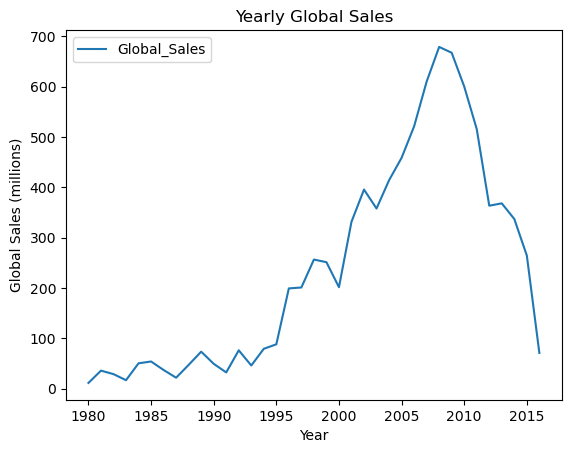

In [243]:
df_uniqueYear = df_uniqueYear.sort_values(by="Year", ascending=False).reset_index()
df_uniqueYear.plot(
x="Year", y="Global_Sales",
kind="line",
xlabel="Year", ylabel="Global Sales (millions)",
title="Yearly Global Sales"
);